In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions"
resp = requests.get(URL)
soup = BeautifulSoup(resp.text, "html.parser")

In [3]:
table = soup.find("table", {"class" : "wikitable sortable"}).tbody
rows = table.find_all("tr")
columns = [v.text for v in rows[0].find_all("th")]

In [5]:
Season=[]
Driver=[]
Age=[]
Car=[]
Engine=[]
Tyres=[]
Poles=[]
Wins=[]
Podiums=[]
FLaps=[]
Points=[]

i=2
while i<(len(rows))-2:
    rows = table.find_all("tr")
    columns = [v.text.replace("\n","") for v in rows[i].find_all("td")]
    
    k=len(columns[1])
    
    if len(columns)==15:
        if columns[0] == "1954":
            columns[3]=" Mercedes"
            columns[4]="Mercedes"
            columns[5]="C"
        if len(columns[5]) >1:
            columns[5]=columns[5][1:]
        Season.append(columns[0][:4])
        Driver.append(columns[1][:k-4])
        Age.append(columns[2])
        Car.append(columns[3])
        Engine.append(columns[4])
        Tyres.append(columns[5])
        Poles.append(columns[6])
        Wins.append(columns[7])
        Podiums.append(columns[8])
        FLaps.append(columns[9])
        Points.append(columns[10])
        
        Season = [int(i) for i in Season]
        Age = [int(i) for i in Age] 
        Poles = [int(i) for i in Poles] 
        Wins = [int(i) for i in Wins] 
        Podiums = [int(i) for i in Podiums] 
        FLaps = [int(i) for i in FLaps] 
        Points = [float(i) for i in Points]
        
    
    i+=1

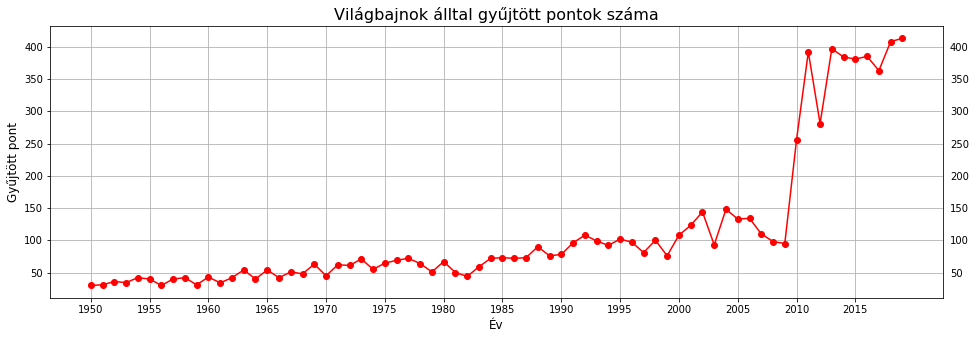

In [6]:
plt.figure(figsize=(16,5))
plt.plot(Season,Points,"r.-",markerfacecolor='r',marker="o")
plt.xticks(Season[::5])
plt.xlabel("Év",fontsize=12)
plt.ylabel("Gyűjtött pont",fontsize=12)
plt.title("Világbajnok álltal gyűjtött pontok száma",fontsize=16)
plt.tick_params(labelright=True)
plt.grid(True)

plt.show()

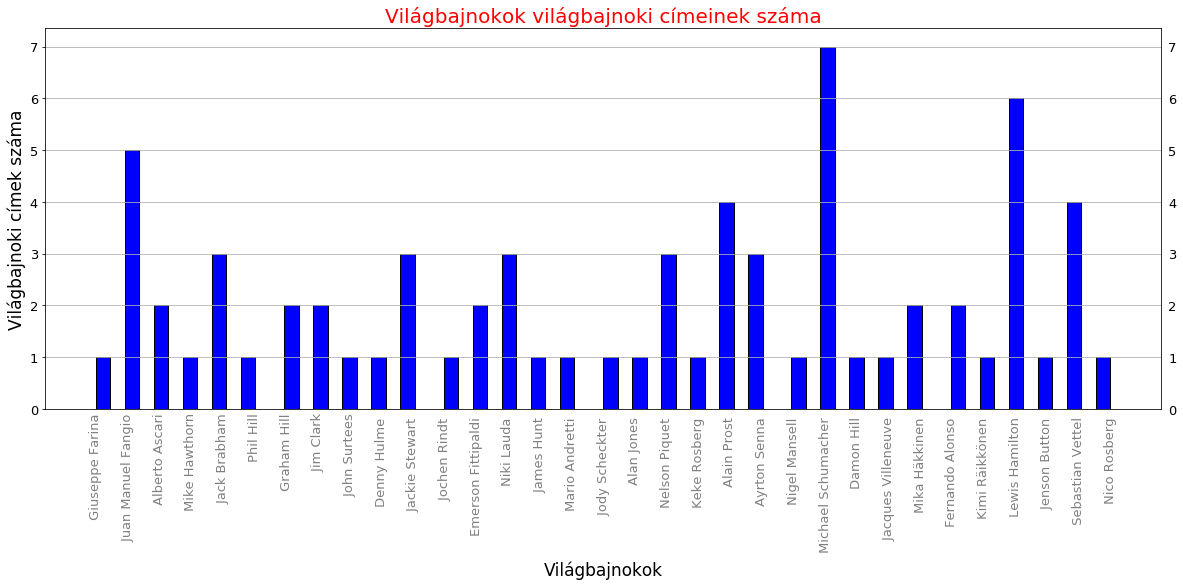

In [7]:
plt.figure(figsize=(20,7))

plt.rcParams['font.size'] = 13
plt.ylabel("Világbajnoki címek száma", fontsize=17,color="black")
plt.xlabel("Világbajnokok", fontsize=17,color="black")
plt.title("Világbajnokok világbajnoki címeinek száma", fontsize=20, color="red")
plt.hist(Driver, bins=len(Driver), color="blue",edgecolor="black")
plt.yticks(np.arange(0, 8, 1))
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tick_params(axis='x', colors='grey',length=0)
plt.tick_params(labelright=True)

plt.show()

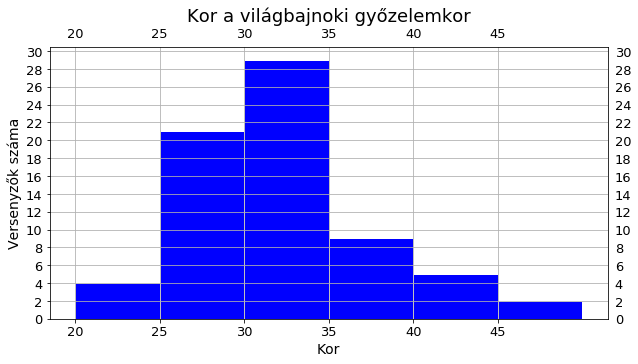

In [21]:
plt.figure(figsize=(10,5))


plt.hist(Age,bins=[20,25,30,35,40,45,50], color="blue",edgecolor="white")

plt.tick_params(labelright=True,labeltop=True)
plt.yticks(np.arange(0,32,step=2))
plt.xticks(np.arange(20,50,step=5))
plt.xlabel("Kor",fontsize=14)
plt.ylabel("Versenyzők száma",fontsize=14)
plt.title("Kor a világbajnoki győzelemkor",fontsize=18)
plt.grid(True)

plt.show()

In [9]:
Pirelli=[]
Continental=[]
Englebert=[]
Dunlop=[]
Goodyear=[]
Firestone=[]
Michelin=[]
Bridgestone=[]

for i in Tyres:
    if i == "P":
        Pirelli.append(i)
    elif i == "C":
        Continental.append(i)
    elif i == "E":
        Englebert.append(i)
    elif i == "D":
        Dunlop.append(i)
    elif i == "G":
        Goodyear.append(i)
    elif i == "F":
        Firestone.append(i)
    elif i == "M":
        Michelin.append(i)
    elif i == "B":
        Bridgestone.append(i)

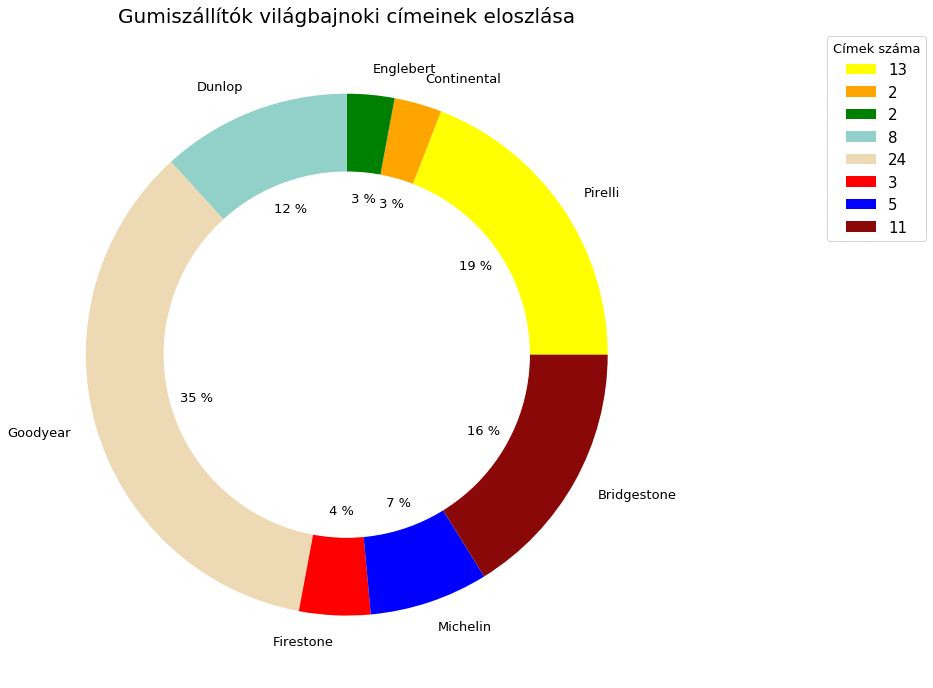

In [23]:
plt.figure(figsize=(12,12))

labels = ["Pirelli" , "Continental","Englebert","Dunlop","Goodyear","Firestone","Michelin","Bridgestone"]
colors = ["yellow", "orange","green","#92d1c9", "#eddab4","red","blue","#8a0808"]
data=[len(Pirelli),len(Continental),len(Englebert),len(Dunlop),len(Goodyear),len(Firestone),len(Michelin),len(Bridgestone)]

plt.pie(data, labels=labels, colors=colors, autopct="%2.f %%",textprops={'fontsize': 13})

plt.legend(data,title="Címek száma",prop={"size":15},bbox_to_anchor=(1.4,1))


plt.title("Gumiszállítók világbajnoki címeinek eloszlása",fontsize=20)
#plt.show()

bkor=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(bkor)
 
plt.show()

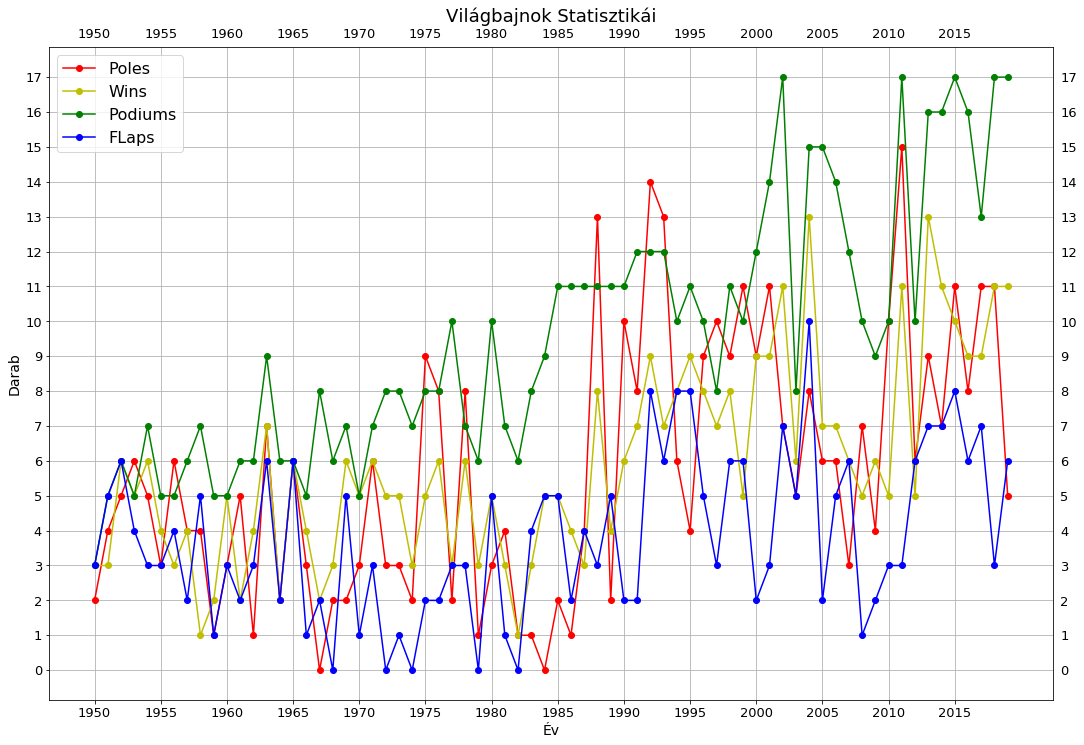

In [11]:
plt.figure(figsize=(18,12))
plt.plot(Season,Poles,"r.-",markerfacecolor='r',marker="o")
plt.plot(Season,Wins,"y.-",markerfacecolor='y',marker="o")
plt.plot(Season,Podiums,"g.-",markerfacecolor='g',marker="o")
plt.plot(Season,FLaps,"b.-",markerfacecolor='b',marker="o")
plt.xticks(Season[::5])
plt.yticks(np.arange(0,18,step=1))
plt.tick_params(labeltop=True, labelright=True)
plt.xlabel("Év",fontsize=14,color="black")
plt.ylabel("Darab",fontsize=14,color="black")
plt.title("Világbajnok Statisztikái",fontsize=18)
plt.grid(True)
plt.legend(["Poles","Wins","Podiums","FLaps"],prop={"size":16})

plt.show()

In [12]:
Engine1=[]

for x in Engine:
    if x not in Engine1:
        Engine1.append(x)


db=[0]*len(Engine1)

for j in Engine:
    if j == Engine1[0]:
        db[0]=db[0]+1
    elif j == Engine1[1]:
        db[1]=db[1]+1
    elif j == Engine1[2]:
        db[2]=db[2]+1
    elif j == Engine1[3]:
        db[3]=db[3]+1
    elif j == Engine1[4]:
        db[4]=db[4]+1
    elif j == Engine1[5]:
        db[5]=db[5]+1
    elif j == Engine1[6]:
        db[6]=db[6]+1
    elif j == Engine1[7]:
        db[7]=db[7]+1
    elif j == Engine1[8]:
        db[8]=db[8]+1
    elif j == Engine1[9]:
        db[9]=db[9]+1
    elif j == Engine1[10]:
        db[10]=db[10]+1
    elif j == Engine1[11]:
        db[11]=db[11]+1

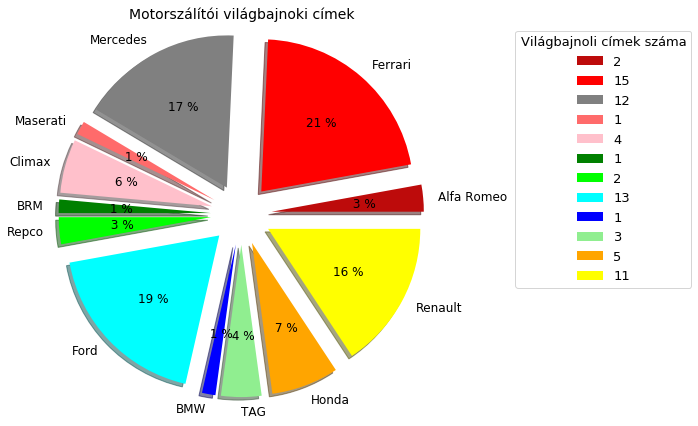

In [13]:
plt.figure(figsize=(15,7))
colors = ["#bd0b0b", "red","grey","#ff6b6b", "pink","green","lime", "cyan","blue", "lightgreen","orange","yellow"]

explode=[.2]*len(Engine1)
plt.pie(db, labels=Engine1, colors=colors, autopct="%2.f %%", explode=explode, shadow=True, radius=1,textprops={'fontsize': 12})

plt.legend(db,title="Világbajnoli címek száma",bbox_to_anchor=(1.7,1))


plt.title("Motorszálítói világbajnoki címek",fontsize=14)
plt.show()

In [19]:
AgeDecade=[]
i=0
k=10
while k<=len(Age):
    AgeDecade.append((sum(Age[i:k]))/len(Age[i:k]))
    i+=10
    k+=10


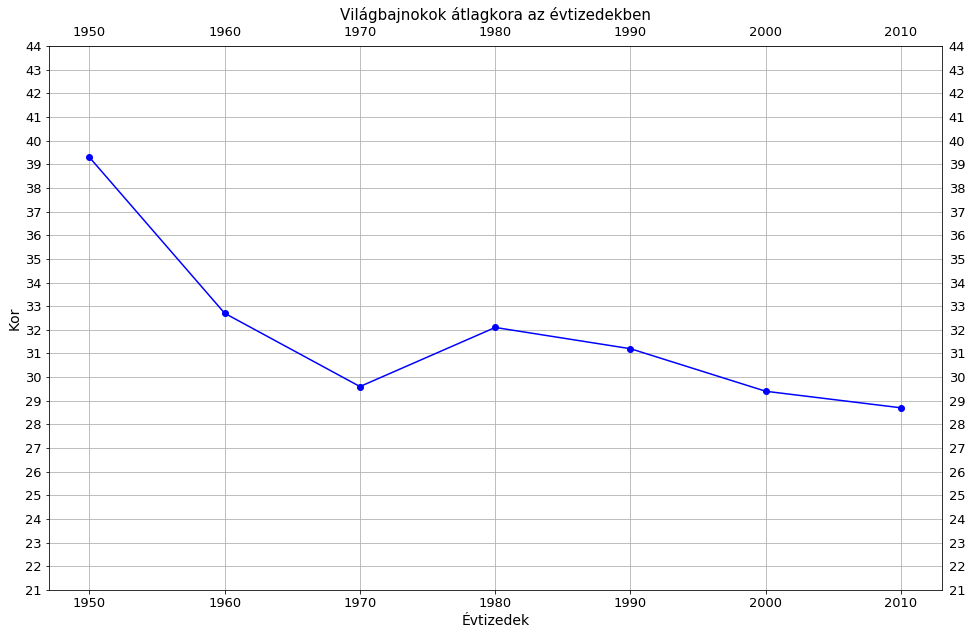

In [15]:
plt.figure(figsize=(16,10))

plt.plot(Season[::10],AgeDecade,"b.-",markerfacecolor='b',marker="o")
plt.xticks(Season[::10])
plt.yticks(np.arange(21,45,step=1))
plt.tick_params(labeltop=True, labelright=True)
plt.xlabel("Évtizedek",fontsize=14,color="black")
plt.ylabel("Kor",fontsize=14,color="black")
plt.title("Világbajnokok átlagkora az évtizedekben",fontsize=15)
plt.grid(True)


plt.show()

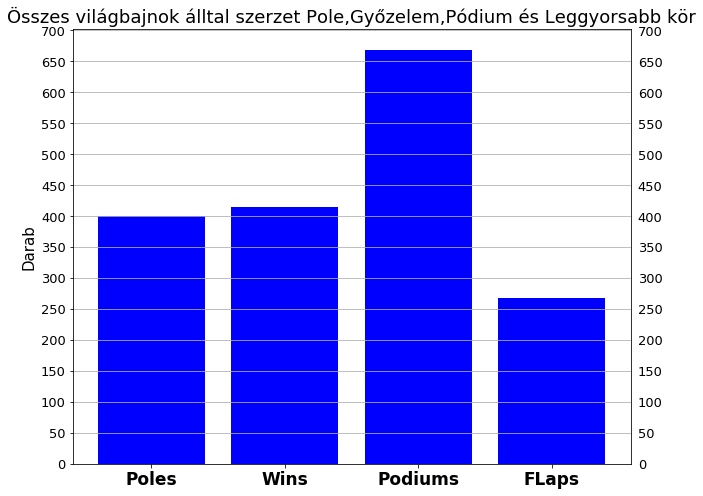

In [16]:
plt.figure(figsize=(10,8))

data = [sum(Poles),sum(Wins),sum(Podiums),sum(FLaps)]
names = ("Poles","Wins","Podiums","FLaps")
long = np.arange(len(names))
plt.bar(long, data, color="blue")

plt.yticks(np.arange(0,750,step=50))
plt.xticks(long, names, color='black', fontweight='bold', fontsize='17')
plt.tick_params(labelright=True)
plt.grid(axis="y")

plt.ylabel("Darab",fontsize=15,color="black")
plt.title("Összes világbajnok álltal szerzet Pole,Győzelem,Pódium és Leggyorsabb kör",fontsize=18)

plt.show()

In [17]:
Marka = []
for v in Car:
    if v not in Marka:
        Marka.append(v)

data=[Car.count(Marka[0]),Car.count(Marka[1]),Car.count(Marka[2]),Car.count(Marka[3]),Car.count(Marka[4]),Car.count(Marka[5]),
     Car.count(Marka[6]),Car.count(Marka[7]),Car.count(Marka[8]),Car.count(Marka[9]),Car.count(Marka[10]),Car.count(Marka[11]),
     Car.count(Marka[12]),Car.count(Marka[13]),Car.count(Marka[14]),Car.count(Marka[15]),]

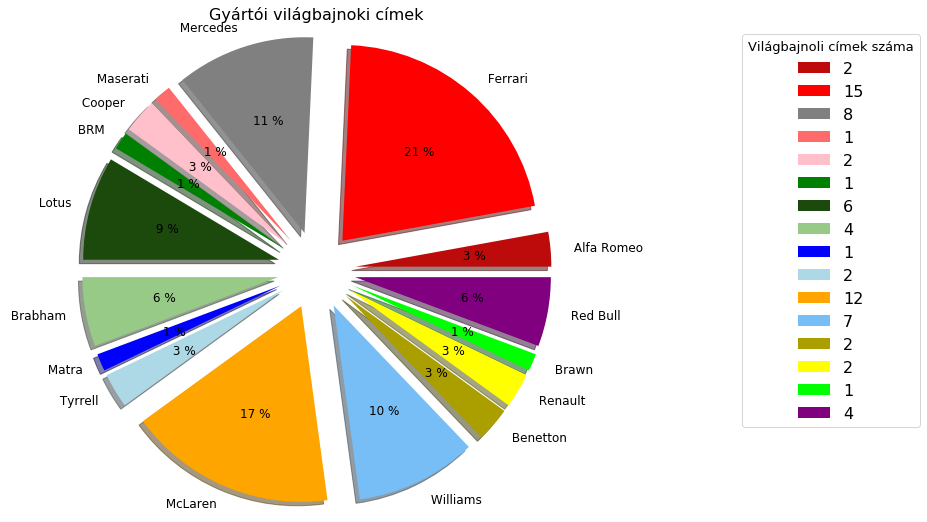

In [18]:
plt.figure(figsize=(15,9))
colors = ["#bd0b0b", "red","grey","#ff6b6b", "pink","green","#1b4a0c", "#97c987","blue", "lightblue","orange","#76bef5",
         "#ab9f00","yellow","lime","purple"]
explode=[.2]*len(Marka)

plt.pie(data, labels=Marka, colors=colors, autopct="%2.f %%", explode=explode, shadow=True, radius=1,textprops={'fontsize': 12})

plt.legend(data,title="Világbajnoli címek száma",bbox_to_anchor=(1.75,1),prop={"size":16})


plt.title("Gyártói világbajnoki címek",fontsize=16)
plt.show()